<h1> Guided Project: Finding Heavy Traffic Indicators on I-94

In [1]:
import pandas as pd
i_94 = pd.read_csv("D:\Dataquest\Intermediate_Python_and_Pandas\Introduction_to_Data_Visualization_in_Python\Metro_Interstate_Traffic_Volume.csv")
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


<h2> Analyzing Traffic Volume

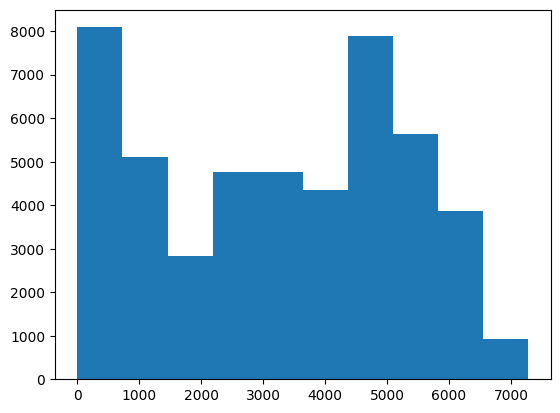

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(i_94["traffic_volume"])
plt.show()

In [4]:
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can note down that the max value is 7280 and the min value is 0.
Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00 the average traffic volume is  3260 vehicles.This is on hourly basis.

<h2> Traffic Volume: Day vs. Night

1. About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
2. About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

In [5]:
# change the date_time column to datetime format

i_94["date_time"] = pd.to_datetime(i_94["date_time"])



We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)

Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [6]:
# day time

day = i_94.copy()[(i_94["date_time"].dt.hour >= 7) & (i_94["date_time"].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94["date_time"].dt.hour >= 19 & (i_94["date_time"].dt.hour < 7))]
print(night.shape)
                

(23877, 9)
(46167, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

<h2> Traffic Volume: Day vs. Night (II)

Now we're going to compare the traffic volume at night and during day.

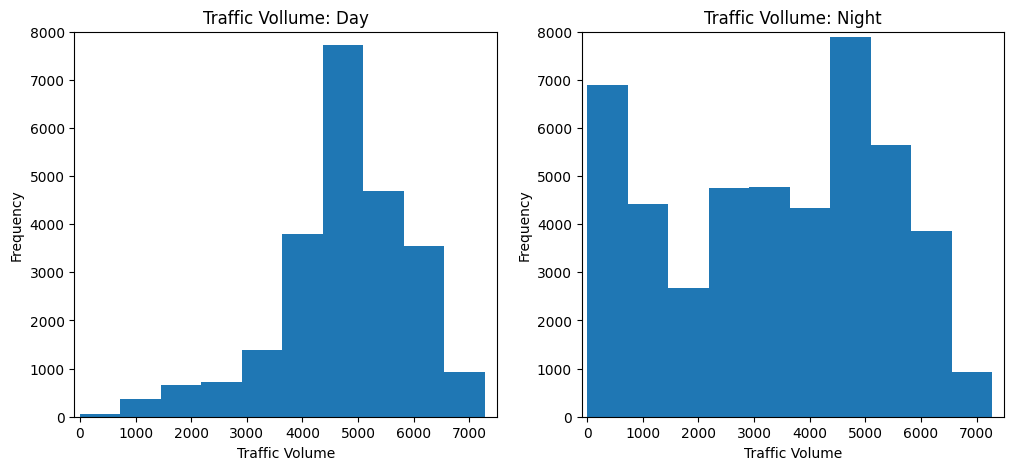

In [7]:
# histogram on a grid chart (To compare night and day) 

plt.figure(figsize= (12,5))
plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Traffic Vollume: Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Traffic Vollume: Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.show()


In [8]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night["traffic_volume"].describe()

count    46167.000000
mean      3366.816882
std       1960.731252
min          0.000000
25%       1522.000000
50%       3560.000000
75%       4982.000000
max       7280.000000
Name: traffic_volume, dtype: float64

<h2> Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

1. Month
2. Day of the week
3. Time of day

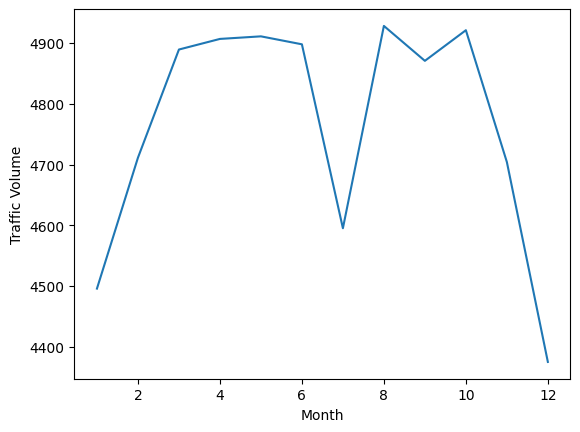

In [10]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only = True)
by_month['traffic_volume'].plot.line()
plt.xlabel("Month")
plt.ylabel("Traffic Volume")
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

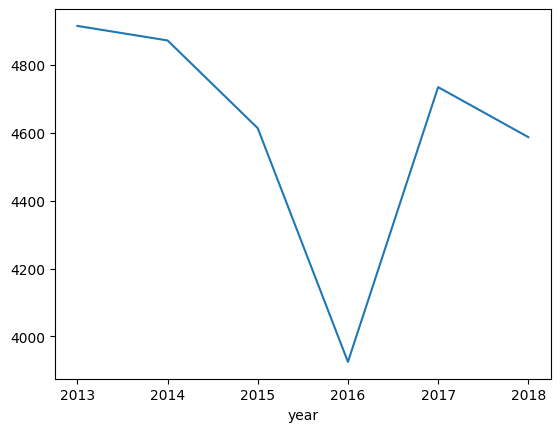

In [11]:
day["year"] = day["date_time"].dt.year
only_july = day[day["month"] == 7]
only_july.groupby("year").mean(numeric_only = True)["traffic_volume"].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — this article from 2016 supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

<h2> Time Indicators (II)

Let's now look at a more granular indicator: day number.



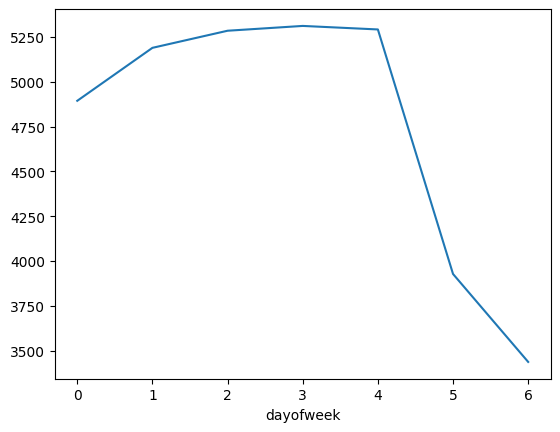

In [12]:
day["dayofweek"] = day["date_time"].dt.dayofweek
by_day = day.groupby("dayofweek").mean(numeric_only = True)
by_day["traffic_volume"].plot.line()
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.



<h2> Time Indicators (III)


Let's now see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look only at the averages separately.



In [13]:
day["hour"] = day["date_time"].dt.hour
bussiness_days = day.copy()[day["dayofweek"] <= 4] # 4 = Friday
weekend = day.copy()[day["dayofweek"] >= 5] 
by_hour_bussiness = bussiness_days.groupby("hour").mean(numeric_only = True)
by_hour_weekend = weekend.groupby("hour").mean(numeric_only = True)

print(by_hour_bussiness["traffic_volume"])
print(by_hour_weekend["traffic_volume"])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


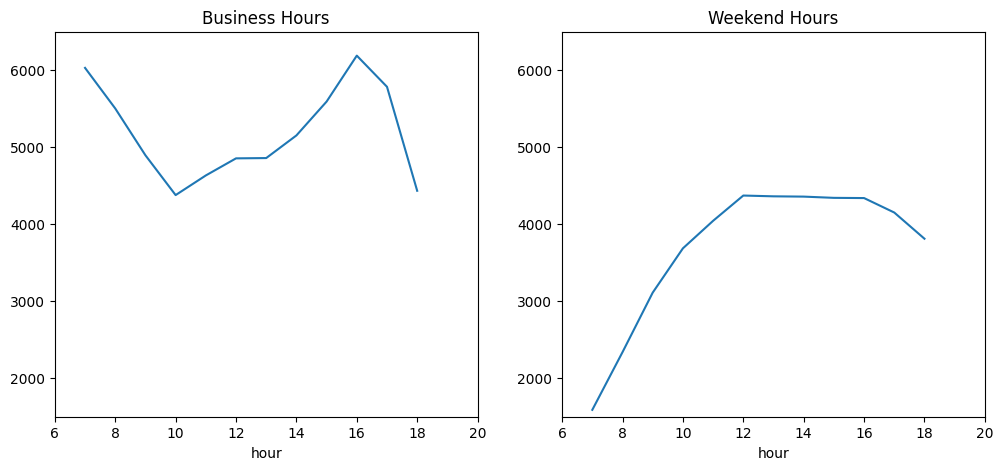

In [14]:
plt.figure(figsize= (12,5))

plt.subplot(1,2,1)
by_hour_bussiness["traffic_volume"].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title("Business Hours")

plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title("Weekend Hours")

plt.show()


<h2> Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.



In [17]:
day.corr(numeric_only= True)['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

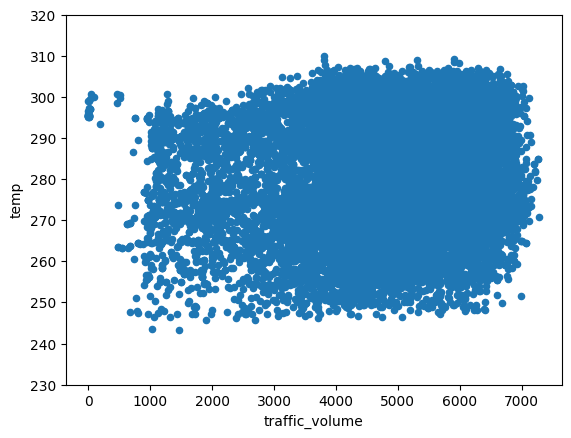

In [20]:
day.plot.scatter("traffic_volume", "temp")
plt.ylim(230, 320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

<h2> Weather Type


To start, we're going to group the data by weather_main and look at the traffic_volume averages.



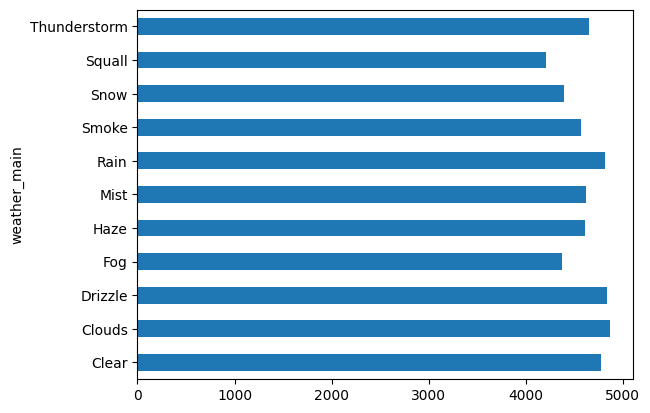

In [21]:
by_weather_main = day.groupby("weather_main").mean(numeric_only = True)
by_weather_main["traffic_volume"].plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.



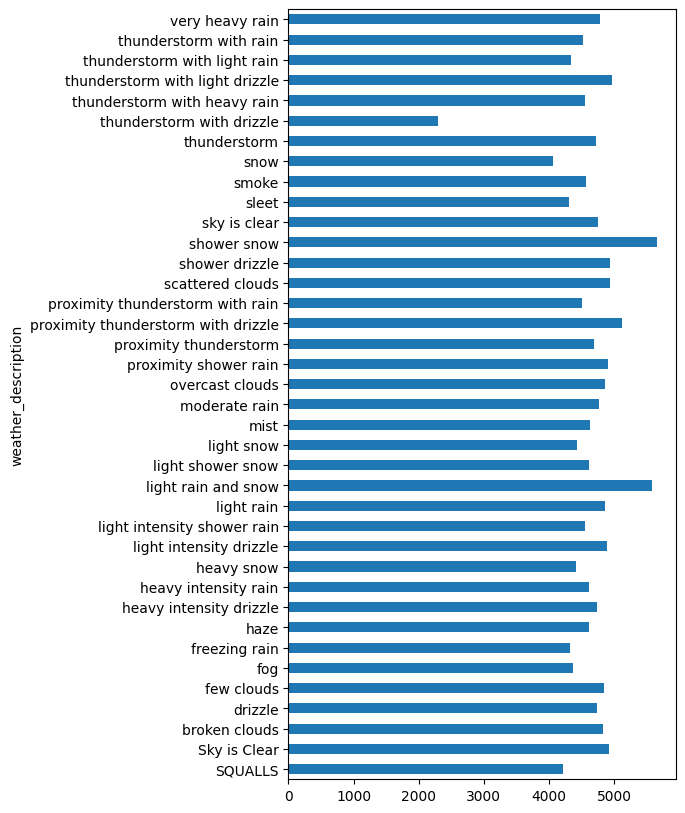

In [28]:
by_weather_description = day.groupby("weather_description").mean(numeric_only = True)
by_weather_description["traffic_volume"].plot.barh(figsize = (5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.